In [1]:
!pip install ptflops


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import time
from ptflops import get_model_complexity_info
import matplotlib.pyplot as plt
import os

# Training loop

In [3]:
def train_model(model, train_loader, num_epochs):
    model.train()
    train_losses = []
    total_training_time = 0  # To track total training time
    for epoch in range(num_epochs):
        start_time = time.time()  # Start timing
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        end_time = time.time()  # End timing
        epoch_time = end_time - start_time
        total_training_time += epoch_time
        train_losses.append(running_loss / len(train_loader))
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Time: {epoch_time:.2f}s")

    print(f"Total Training Time: {total_training_time:.2f}s")
    return train_losses

# Evaluation function

In [4]:

# Evaluation function
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    print(f"Evaluation Accuracy: {accuracy:.2f}%")
    return accuracy

# 1. To design, train, and evaluate an image classification method on Flowers102 dataset. This dataset contains 102 classes.

FLOPs: 4.49 GMac, Parameters: 27.9 M

Starting training...
Epoch 1/15, Loss: 1.9755, Time: 51.72s
Epoch 2/15, Loss: 0.2498, Time: 51.52s
Epoch 3/15, Loss: 0.0740, Time: 51.44s
Epoch 4/15, Loss: 0.0350, Time: 51.51s
Epoch 5/15, Loss: 0.0182, Time: 51.46s
Epoch 6/15, Loss: 0.0188, Time: 51.31s
Epoch 7/15, Loss: 0.0146, Time: 51.30s
Epoch 8/15, Loss: 0.0076, Time: 51.49s
Epoch 9/15, Loss: 0.0066, Time: 51.22s
Epoch 10/15, Loss: 0.0054, Time: 51.22s
Epoch 11/15, Loss: 0.0039, Time: 51.35s
Epoch 12/15, Loss: 0.0032, Time: 51.38s
Epoch 13/15, Loss: 0.0029, Time: 51.20s
Epoch 14/15, Loss: 0.0027, Time: 51.23s
Epoch 15/15, Loss: 0.0021, Time: 51.38s
Total Training Time: 770.73s

Evaluating on test set...
Evaluation Accuracy: 98.04%


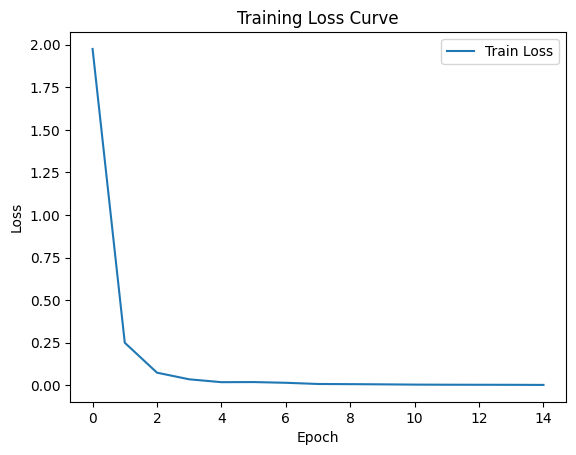

In [18]:
# Hyperparameters
batch_size = 32
num_epochs = 15
learning_rate = 1e-4
weight_decay = 0.01

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ConvNeXt input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load Flowers102 dataset (Ensure dataset is available in the environment)
flowers_train = datasets.Flowers102(root="./data", split="test", download=True, transform=transform)
flowers_test = datasets.Flowers102(root="./data", split="train", download=True, transform=transform)

# Create data loaders
train_dataloader = DataLoader(flowers_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(flowers_test, batch_size=32, shuffle=False)

# Load ConvNeXt model (pretrained on ImageNet)
model = models.convnext_tiny(pretrained=True)

# Modify the classifier head for 102 classes
num_features = model.classifier[2].in_features
model.classifier[2] = nn.Linear(num_features, 102)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Measure FLOPs and parameter count
with torch.cuda.device(0):  # Ensure the device matches your setup
    macs, params = get_model_complexity_info(
        model, (3, 224, 224), as_strings=True, print_per_layer_stat=False, verbose=False
    )
print(f"FLOPs: {macs}, Parameters: {params}")



# Train the model
print("\nStarting training...")
train_losses = train_model(model, train_dataloader, num_epochs)

# Evaluate the model
print("\nEvaluating on test set...")
test_accuracy = evaluate_model(model, test_dataloader)

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Save the trained model
#torch.save(model.state_dict(), "convnext_flowers_imagewoof.pth")
#print("Model saved as 'convnext_flowers_imagewoof.pth'")


FLOPs: 4.49 GMac, Parameters: 27.9 M

Starting training...
Epoch [1/20], Loss: 3.3864
Epoch [2/20], Loss: 1.7769
Epoch [3/20], Loss: 1.3934
Epoch [4/20], Loss: 1.2615
Epoch [5/20], Loss: 1.2216
Epoch [6/20], Loss: 1.1689
Epoch [7/20], Loss: 1.1632
Epoch [8/20], Loss: 1.1990
Epoch [9/20], Loss: 1.1151
Epoch [10/20], Loss: 1.1153
Epoch [11/20], Loss: 1.1395
Epoch [12/20], Loss: 1.0708
Epoch [13/20], Loss: 1.1696
Epoch [14/20], Loss: 1.0910
Epoch [15/20], Loss: 1.1439
Epoch [16/20], Loss: 1.1451
Epoch [17/20], Loss: 1.1386
Epoch [18/20], Loss: 1.0186
Epoch [19/20], Loss: 1.0664
Epoch [20/20], Loss: 1.0691

Evaluating on test set...
Test Accuracy: 98.39%


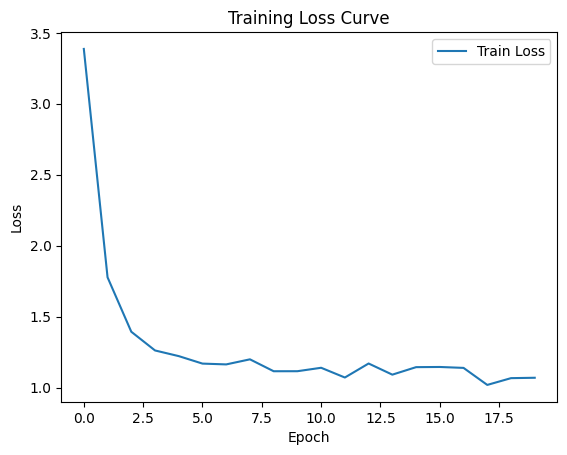

In [15]:

# Hyperparameters
batch_size = 32
num_epochs = 20  # Increased epochs for better convergence
learning_rate = 1e-4
weight_decay = 1e-4  # Adjusted for AdamW optimizer

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for data preprocessing with stronger augmentations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ConvNeXt input size
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load Flowers102 dataset
flowers_train = datasets.Flowers102(root="./data", split="test", download=True, transform=transform)
flowers_test = datasets.Flowers102(root="./data", split="train", download=True, transform=transform)

# Create data loaders
train_dataloader = DataLoader(flowers_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataloader = DataLoader(flowers_test, batch_size=batch_size, shuffle=False, drop_last=True)

# Modify ConvNeXt-Tiny for 102 classes
class ModifiedConvNeXtTiny(nn.Module):
    def __init__(self, num_classes=102):
        super(ModifiedConvNeXtTiny, self).__init__()
        self.model = models.convnext_tiny(pretrained=True)

        # Modify the classifier to match the number of classes
        num_features = self.model.classifier[2].in_features
        self.model.classifier[2] = nn.Sequential(
            nn.Dropout(0.5),  # Add Dropout for regularization
            nn.Linear(num_features, num_classes)  # Output 102 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
model = ModifiedConvNeXtTiny(num_classes=102).to(device)


# Define optimizer and learning rate scheduler
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Define MixUp augmentation
from timm.data import Mixup
from timm.loss import SoftTargetCrossEntropy
mixup_fn = Mixup(mixup_alpha=0.2, cutmix_alpha=0.2, prob=0.5)

# Define loss function
criterion = SoftTargetCrossEntropy()



# Measure FLOPs and parameter count
with torch.cuda.device(0):  # Ensure the device matches your setup
    macs, params = get_model_complexity_info(
        model, (3, 224, 224), as_strings=True, print_per_layer_stat=False, verbose=False
    )
print(f"FLOPs: {macs}, Parameters: {params}")

# Continue with the training and evaluation as described in the earlier code

# Define MixUp augmentation
mixup_fn = Mixup(mixup_alpha=0.2, cutmix_alpha=0.2, prob=0.5, num_classes=102)

# Train the model
print("\nStarting training...")
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Apply MixUp augmentation
        if mixup_fn:
            inputs, targets = mixup_fn(inputs, targets)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_loss)
    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the model
print("\nEvaluating on test set...")
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = correct / total * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


# 2.To design, train, and evaluate a classification method on Imagewoof dataset.

---


This dataset contains 10 classes.

Dataset already exists.

Starting training...
Epoch 1/15, Loss: 0.3110, Time: 96.17s
Epoch 2/15, Loss: 0.0681, Time: 96.04s
Epoch 3/15, Loss: 0.0354, Time: 96.04s
Epoch 4/15, Loss: 0.0341, Time: 96.05s
Epoch 5/15, Loss: 0.0325, Time: 96.09s
Epoch 6/15, Loss: 0.0372, Time: 96.21s
Epoch 7/15, Loss: 0.0185, Time: 96.14s
Epoch 8/15, Loss: 0.0086, Time: 96.13s
Epoch 9/15, Loss: 0.0151, Time: 96.14s
Epoch 10/15, Loss: 0.0129, Time: 95.99s
Epoch 11/15, Loss: 0.0203, Time: 96.12s
Epoch 12/15, Loss: 0.0119, Time: 96.03s
Epoch 13/15, Loss: 0.0284, Time: 96.10s
Epoch 14/15, Loss: 0.0257, Time: 96.23s
Epoch 15/15, Loss: 0.0188, Time: 96.06s
Total Training Time: 1441.53s

Evaluating on test set...
Evaluation Accuracy: 94.78%


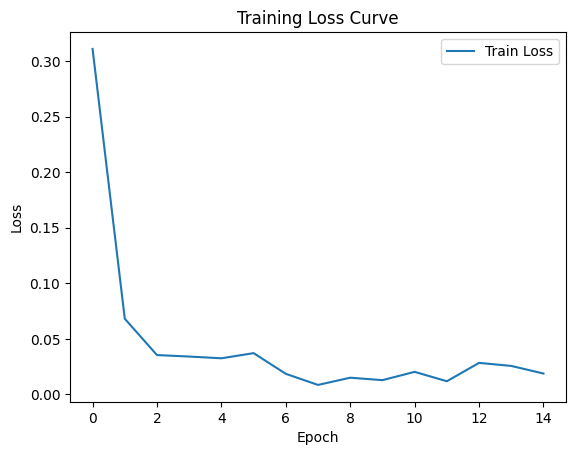

In [25]:
def download_imagewoof(url, download_path, extract_path):
    if not os.path.exists(os.path.dirname(download_path)):
        os.makedirs(os.path.dirname(download_path))  # Create directory if it doesn't exist

    if not os.path.exists(extract_path):  # Check if dataset is already extracted
        print(f"Downloading dataset from {url}...")
        urllib.request.urlretrieve(url, download_path)  # Download the dataset
        print("Download complete. Extracting files...")

        # Extract the .tgz file
        with tarfile.open(download_path, 'r:gz') as tar:
            tar.extractall(path=extract_path)  # Extract files to the folder
        print("Extraction complete.")
    else:
        print("Dataset already exists.")

# URL for ImageWoof dataset
imagewoof_url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-160.tgz'
download_path = './data/imagewoof2-160.tgz'
extract_path = './data/imagewoof2-160'  # Path to extract the files

# Download and extract the ImageWoof dataset
download_imagewoof(imagewoof_url, download_path, extract_path)

# Set the directories for train and validation sets
train_dir = os.path.join(extract_path, 'imagewoof2-160/train')
valid_dir = os.path.join(extract_path, 'imagewoof2-160/val')

# Define transformations (resize, normalize, and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 (standard for pretrained models)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize to ImageNet stats
])

# Load ImageWoof dataset
imagewoof_train = datasets.ImageFolder(root=train_dir, transform=transform)
imagewoof_val = datasets.ImageFolder(root=valid_dir, transform=transform)

# Create data loaders
train_dataloader = DataLoader(imagewoof_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(imagewoof_val, batch_size=32, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ConvNeXt model (pretrained on ImageNet)
model = models.convnext_base(pretrained=True)

# Modify the classifier head for 10 classes (ImageWoof has 10 classes)
num_features = model.classifier[2].in_features
model.classifier[2] = nn.Linear(num_features, 10)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


# Train the model
print("\nStarting training...")
train_losses = train_model(model, train_dataloader, num_epochs=15)

# Evaluate the model
print("\nEvaluating on test set...")
test_accuracy = evaluate_model(model, test_dataloader)

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

Dataset already exists.
FLOPs: 4.49 GMac, Parameters: 27.83 M

Starting training...
Epoch [1/20], Loss: 1.0009
Epoch [2/20], Loss: 0.8117
Epoch [3/20], Loss: 0.7632
Epoch [4/20], Loss: 0.7373
Epoch [5/20], Loss: 0.7095
Epoch [6/20], Loss: 0.7207
Epoch [7/20], Loss: 0.7180
Epoch [8/20], Loss: 0.7174
Epoch [9/20], Loss: 0.7293
Epoch [10/20], Loss: 0.7082
Epoch [11/20], Loss: 0.6853
Epoch [12/20], Loss: 0.7238
Epoch [13/20], Loss: 0.6740
Epoch [14/20], Loss: 0.6916
Epoch [15/20], Loss: 0.6826
Epoch [16/20], Loss: 0.7069
Epoch [17/20], Loss: 0.6982
Epoch [18/20], Loss: 0.6829
Epoch [19/20], Loss: 0.6763
Epoch [20/20], Loss: 0.6813

Evaluating on test set...
Test Accuracy: 96.26%


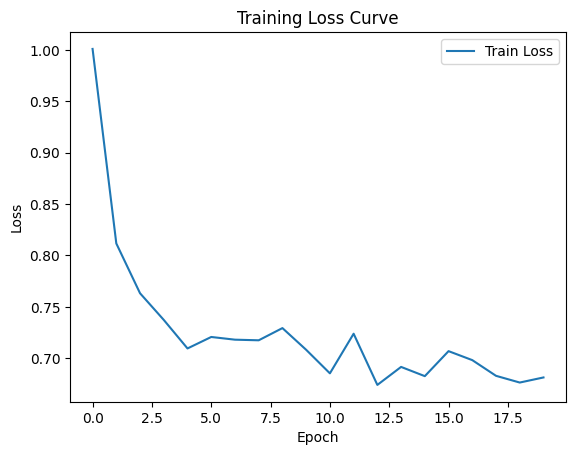

In [9]:
# Hyperparameters
batch_size = 32
num_epochs = 20  # Increased epochs for better convergence
learning_rate = 1e-4
weight_decay = 1e-4

def download_imagewoof(url, download_path, extract_path):
    if not os.path.exists(os.path.dirname(download_path)):
        os.makedirs(os.path.dirname(download_path))  # Create directory if it doesn't exist

    if not os.path.exists(extract_path):  # Check if dataset is already extracted
        print(f"Downloading dataset from {url}...")
        urllib.request.urlretrieve(url, download_path)  # Download the dataset
        print("Download complete. Extracting files...")

        # Extract the .tgz file
        with tarfile.open(download_path, 'r:gz') as tar:
            tar.extractall(path=extract_path)  # Extract files to the folder
        print("Extraction complete.")
    else:
        print("Dataset already exists.")

# URL for ImageWoof dataset
imagewoof_url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-160.tgz'
download_path = './data/imagewoof2-160.tgz'
extract_path = './data/imagewoof2-160'  # Path to extract the files

# Download and extract the ImageWoof dataset
download_imagewoof(imagewoof_url, download_path, extract_path)

# Set the directories for train and validation sets
train_dir = os.path.join(extract_path, 'imagewoof2-160/train')
valid_dir = os.path.join(extract_path, 'imagewoof2-160/val')

# Define transformations (resize, normalize, and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 (standard for pretrained models)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize to ImageNet stats
])

# Load ImageWoof dataset
imagewoof_train = datasets.ImageFolder(root=train_dir, transform=transform)
imagewoof_val = datasets.ImageFolder(root=valid_dir, transform=transform)

# Create data loaders
train_dataloader = DataLoader(imagewoof_train, batch_size=32, shuffle=True,drop_last=True)
test_dataloader = DataLoader(imagewoof_val, batch_size=32, shuffle=False,drop_last=True)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Modify ConvNeXt-Tiny for 10 classes
class ModifiedConvNeXtTiny(nn.Module):
    def __init__(self, num_classes=10):
        super(ModifiedConvNeXtTiny, self).__init__()
        self.model = models.convnext_tiny(pretrained=True)

        # Modify the classifier to match the number of classes
        num_features = self.model.classifier[2].in_features
        self.model.classifier[2] = nn.Sequential(
            nn.Dropout(0.5),  # Add Dropout for regularization
            nn.Linear(num_features, num_classes)  # Output 10 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model
model = ModifiedConvNeXtTiny(num_classes=10).to(device)


# Define optimizer and learning rate scheduler
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Define MixUp augmentation
from timm.data import Mixup
from timm.loss import SoftTargetCrossEntropy
mixup_fn = Mixup(mixup_alpha=0.2, cutmix_alpha=0.2, prob=0.5)

# Define loss function
criterion = SoftTargetCrossEntropy()



# Measure FLOPs and parameter count
with torch.cuda.device(0):  # Ensure the device matches your setup
    macs, params = get_model_complexity_info(
        model, (3, 224, 224), as_strings=True, print_per_layer_stat=False, verbose=False
    )
print(f"FLOPs: {macs}, Parameters: {params}")

# Continue with the training and evaluation as described in the earlier code

# Define MixUp augmentation
mixup_fn = Mixup(mixup_alpha=0.2, cutmix_alpha=0.2, prob=0.5, num_classes=10)

# Train the model
print("\nStarting training...")
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Apply MixUp augmentation
        if mixup_fn:
            inputs, targets = mixup_fn(inputs, targets)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    train_losses.append(epoch_loss)
    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the model
print("\nEvaluating on test set...")
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = correct / total * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


# 3. To design, train, and evaluate a classification method on a combined set of (Flowers102 + FGVC Aircraft + Imagewoof). It will have 102 + 100 + 10 = 212 classes.

Dataset already exists.

Starting training...
Epoch 1/15, Loss: 1.8334, Time: 329.29s
Epoch 2/15, Loss: 0.4554, Time: 328.90s
Epoch 3/15, Loss: 0.1851, Time: 328.28s
Epoch 4/15, Loss: 0.1082, Time: 328.96s
Epoch 5/15, Loss: 0.0610, Time: 328.56s
Epoch 6/15, Loss: 0.0462, Time: 330.97s
Epoch 7/15, Loss: 0.0354, Time: 331.24s
Epoch 8/15, Loss: 0.0454, Time: 330.46s
Epoch 9/15, Loss: 0.0313, Time: 330.77s
Epoch 10/15, Loss: 0.0285, Time: 329.58s
Epoch 11/15, Loss: 0.0321, Time: 329.94s
Epoch 12/15, Loss: 0.0326, Time: 329.07s
Epoch 13/15, Loss: 0.0258, Time: 331.03s
Epoch 14/15, Loss: 0.0286, Time: 330.57s
Epoch 15/15, Loss: 0.0247, Time: 329.45s
Total Training Time: 4947.03s

Evaluating on test set...
Evaluation Accuracy: 89.82%


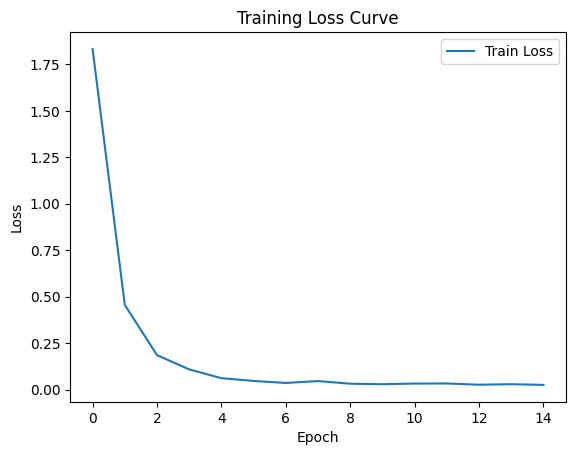

In [7]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch import nn, optim
from torch.utils.data import ConcatDataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
import urllib.request
import tarfile

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Download ImageWoof dataset
def download_imagewoof(url, download_path, extract_path):
    if not os.path.exists(os.path.dirname(download_path)):
        os.makedirs(os.path.dirname(download_path))
    if not os.path.exists(extract_path):
        print(f"Downloading {url}...")
        try:
            urllib.request.urlretrieve(url, download_path)
            with tarfile.open(download_path, 'r:gz') as tar:
                tar.extractall(path=extract_path)
            print("Download complete.")
        except Exception as e:
            print(f"Failed to download {url}. Error: {e}")
    else:
        print("Dataset already exists.")

# Paths and dataset URLs
imagewoof_url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-160.tgz'
imagewoof_root = './data/imagewoof2-160'
fgvc_aircraft_root = './data'
flowers102_root = './data/flowers-102'

# Download ImageWoof dataset
download_imagewoof(imagewoof_url, './data/imagewoof2-160.tgz', imagewoof_root)

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
imagewoof_train = ImageFolder(os.path.join(imagewoof_root, 'imagewoof2-160/train'), transform=transform)
imagewoof_val = ImageFolder(os.path.join(imagewoof_root, 'imagewoof2-160/val'), transform=transform)
fgvc_trainval = torchvision.datasets.FGVCAircraft(root=fgvc_aircraft_root, split='trainval', download=True, transform=transform)
fgvc_test = torchvision.datasets.FGVCAircraft(root=fgvc_aircraft_root, split='test', download=True, transform=transform)
flowers_train = torchvision.datasets.Flowers102(root=flowers102_root, split='test', download=True, transform=transform)
flowers_test = torchvision.datasets.Flowers102(root=flowers102_root, split='train', download=True, transform=transform)

# Custom dataset classes
class RemappedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, startlabel):
        self.dataset = dataset
        self.startlabel = startlabel
        self.remapped_targets = [label + startlabel for _, label in dataset]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        image, label = self.dataset[index]
        return image, self.remapped_targets[index]

# Remap and combine datasets
start_label = 0
imagewoof_train = RemappedDataset(imagewoof_train, start_label)
start_label += len(set(imagewoof_train.remapped_targets))
fgvc_trainval = RemappedDataset(fgvc_trainval, start_label)
start_label += len(set(fgvc_trainval.remapped_targets))
flowers_train = RemappedDataset(flowers_train, start_label)
start_label += len(set(flowers_train.remapped_targets))
imagewoof_val = RemappedDataset(imagewoof_val, 0)
fgvc_test = RemappedDataset(fgvc_test, len(set(imagewoof_train.remapped_targets)))
flowers_test = RemappedDataset(flowers_test, len(set(imagewoof_train.remapped_targets)) + len(set(fgvc_trainval.remapped_targets)))

# Create train and test datasets
train_dataset = ConcatDataset([imagewoof_train, fgvc_trainval, flowers_train])
test_dataset = ConcatDataset([imagewoof_val, fgvc_test, flowers_test])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load ConvNeXt model
model = models.convnext_base(weights=models.ConvNeXt_Base_Weights.IMAGENET1K_V1)

# Modify the classifier head for the combined dataset (212 classes)
num_classes = len(set(imagewoof_train.remapped_targets)) + len(set(fgvc_trainval.remapped_targets)) + len(set(flowers_train.remapped_targets))
num_features = model.classifier[2].in_features
model.classifier[2] = nn.Linear(num_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Train the model
print("\nStarting training...")
train_losses = train_model(model, train_loader, num_epochs=15)

# Evaluate the model
print("\nEvaluating on test set...")
test_accuracy = evaluate_model(model, test_loader)

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()

Dataset already exists.

Starting training...
Epoch [1/20], Loss: 2.6566
Epoch [2/20], Loss: 1.6292
Epoch [3/20], Loss: 1.4140
Epoch [4/20], Loss: 1.3112
Epoch [5/20], Loss: 1.2376
Epoch [6/20], Loss: 1.2134
Epoch [7/20], Loss: 1.1770
Epoch [8/20], Loss: 1.1905
Epoch [9/20], Loss: 1.1838
Epoch [10/20], Loss: 1.1437
Epoch [11/20], Loss: 1.1558
Epoch [12/20], Loss: 1.1837
Epoch [13/20], Loss: 1.0996
Epoch [14/20], Loss: 1.1195
Epoch [15/20], Loss: 1.1365
Epoch [16/20], Loss: 1.1145
Epoch [17/20], Loss: 1.1208
Epoch [18/20], Loss: 1.1298
Epoch [19/20], Loss: 1.0953
Epoch [20/20], Loss: 1.0821

Evaluating on test set...
Test Accuracy: 94.13%


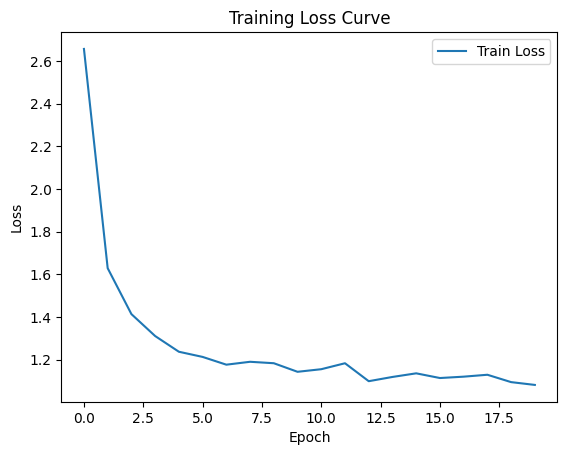

In [19]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch import nn, optim
from torch.utils.data import ConcatDataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
import urllib.request
import tarfile

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Download ImageWoof dataset
def download_imagewoof(url, download_path, extract_path):
    if not os.path.exists(os.path.dirname(download_path)):
        os.makedirs(os.path.dirname(download_path))
    if not os.path.exists(extract_path):
        print(f"Downloading {url}...")
        try:
            urllib.request.urlretrieve(url, download_path)
            with tarfile.open(download_path, 'r:gz') as tar:
                tar.extractall(path=extract_path)
            print("Download complete.")
        except Exception as e:
            print(f"Failed to download {url}. Error: {e}")
    else:
        print("Dataset already exists.")

# Paths and dataset URLs
imagewoof_url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-160.tgz'
imagewoof_root = './data/imagewoof2-160'
fgvc_aircraft_root = './data'
flowers102_root = './data/flowers-102'

# Download ImageWoof dataset
download_imagewoof(imagewoof_url, './data/imagewoof2-160.tgz', imagewoof_root)

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load datasets
imagewoof_train = ImageFolder(os.path.join(imagewoof_root, 'imagewoof2-160/train'), transform=transform)
imagewoof_val = ImageFolder(os.path.join(imagewoof_root, 'imagewoof2-160/val'), transform=transform)
fgvc_trainval = torchvision.datasets.FGVCAircraft(root=fgvc_aircraft_root, split='trainval', download=True, transform=transform)
fgvc_test = torchvision.datasets.FGVCAircraft(root=fgvc_aircraft_root, split='test', download=True, transform=transform)
flowers_train = torchvision.datasets.Flowers102(root=flowers102_root, split='test', download=True, transform=transform)
flowers_test = torchvision.datasets.Flowers102(root=flowers102_root, split='train', download=True, transform=transform)

# Custom dataset classes
class RemappedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, startlabel):
        self.dataset = dataset
        self.startlabel = startlabel
        self.remapped_targets = [label + startlabel for _, label in dataset]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        image, label = self.dataset[index]
        return image, self.remapped_targets[index]

# Remap and combine datasets
start_label = 0
imagewoof_train = RemappedDataset(imagewoof_train, start_label)
start_label += len(set(imagewoof_train.remapped_targets))
fgvc_trainval = RemappedDataset(fgvc_trainval, start_label)
start_label += len(set(fgvc_trainval.remapped_targets))
flowers_train = RemappedDataset(flowers_train, start_label)
start_label += len(set(flowers_train.remapped_targets))
imagewoof_val = RemappedDataset(imagewoof_val, 0)
fgvc_test = RemappedDataset(fgvc_test, len(set(imagewoof_train.remapped_targets)))
flowers_test = RemappedDataset(flowers_test, len(set(imagewoof_train.remapped_targets)) + len(set(fgvc_trainval.remapped_targets)))

# Create train and test datasets
train_dataset = ConcatDataset([imagewoof_train, fgvc_trainval, flowers_train])
test_dataset = ConcatDataset([imagewoof_val, fgvc_test, flowers_test])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False,drop_last=True)


# Modify ConvNeXt-Tiny for 102 classes
class ModifiedConvNeXtTiny(nn.Module):
    def __init__(self, num_classes=212):
        super(ModifiedConvNeXtTiny, self).__init__()
        self.model = models.convnext_tiny(pretrained=True)

        # Modify the classifier to match the number of classes
        num_features = self.model.classifier[2].in_features
        self.model.classifier[2] = nn.Sequential(
            nn.Dropout(0.5),  # Add Dropout for regularization
            nn.Linear(num_features, num_classes)  # Output 102 classes
        )

    def forward(self, x):
        return self.model(x)


# Load ConvNeXt model
model = models.convnext_base(weights=models.ConvNeXt_Base_Weights.IMAGENET1K_V1)

# Modify the classifier head for the combined dataset (212 classes)
num_classes = len(set(imagewoof_train.remapped_targets)) + len(set(fgvc_trainval.remapped_targets)) + len(set(flowers_train.remapped_targets))
num_features = model.classifier[2].in_features
model.classifier[2] = nn.Linear(num_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# Define MixUp augmentation
from timm.data import Mixup
from timm.loss import SoftTargetCrossEntropy
mixup_fn = Mixup(mixup_alpha=0.2, cutmix_alpha=0.2, prob=0.5, num_classes=num_classes)


# Define loss function
criterion = SoftTargetCrossEntropy()


# Train the model
print("\nStarting training...")
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Apply MixUp augmentation
        if mixup_fn:
            inputs, targets = mixup_fn(inputs, targets)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the model
print("\nEvaluating on test set...")
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

test_accuracy = correct / total * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot training loss
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()